# Assignment 2 of Tianhuan Tu

[TOC]

## Exercise1

### Encapsulated codes

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.autograd import Variable


In [2]:
N = 100  # number of points per class
D = 2  # dimensionality
K = 3  # number of classes

In [3]:
def pre_train(is_visualized=False):
    """
    used to generate the data to construct the neural network mode
    :param is_visualized:
    :return: x1: argument input vectors
    :return: y1
    """

    X = np.zeros((N * K, D))  # data matrix (each row = single example)
    y = np.zeros(N * K, dtype='uint8')  # class labels
    for j in range(K):
        ix = range(N * j, N * (j + 1))
        r = np.linspace(0.0, 1, N)  # radius
        t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j

    # argument input vectors
    x1 = Variable(torch.from_numpy(X).type(torch.FloatTensor), requires_grad=False)
    el1 = torch.cat((torch.ones(100), torch.zeros(200)), 0)
    el2 = torch.cat((torch.zeros(100), torch.ones(100), torch.zeros(100)), 0)
    el3 = torch.cat((torch.zeros(200), torch.ones(100)), 0)
    yy = torch.stack((el1, el2, el3), 1)
    y1 = Variable(torch.stack((el1, el2, el3), 1), requires_grad=False)

    if is_visualized:
        # visualize the data:
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.show()

    return x1, y1



In [4]:
def gradient_descent_with_relu(x1, y1, learning_rate=0.0001, n_units=50, n_iterations=100_000):
    """
    gradient descent for the neural network model with ReLU
    :param x1: the input vector
    :param y1:
    :param learning_rate: the learning rate
    :param n_units: the number of units in the hidden layer
    :param n_iterations: the number of hte iterations for gradient descent
    :return: a numpy array of loss values over each gradient descent
    """
    # define loss value record
    loss_values = np.zeros(n_iterations)

    # parameters
    w1 = Variable(0.5 * torch.randn(D, n_units), requires_grad=True)
    b1 = Variable(torch.randn(1, n_units), requires_grad=True)
    w2 = Variable(0.5 * torch.randn(n_units, K), requires_grad=True)
    b2 = Variable(torch.randn((1, K)), requires_grad=True)

    # run with different learning rates
    # gradient descent loop
    for i in range(n_iterations):

        # Forward pass
        hout = x1.mm(w1) + b1
        h_relu = hout.clamp(min=0)
        output = h_relu.mm(w2) + b2  # output of NN
        # scores = output.clamp(min=0)
        scores = output

        # compute the loss
        loss = (scores - y1).pow(2).sum()
        loss_values[i] = loss

        loss.backward()

        # perform a parameter update
        w2.data -= learning_rate * w2.grad.data
        w1.data -= learning_rate * w1.grad.data
        b2.data -= learning_rate * b2.grad.data
        b1.data -= learning_rate * b1.grad.data

        # Manually zero the gradient after the backward pass
        w1.grad.data.zero_()
        w2.grad.data.zero_()
        b2.grad.data.zero_()
        b1.grad.data.zero_()

    # evaluate training set accuracy
    desired_class = torch.cat((torch.zeros(100), torch.ones(100), torch.add(torch.ones(100), 1)), 0)
    hout = x1.mm(w1) + b1
    h_relu = hout.clamp(min=0)
    output = h_relu.mm(w2) + b2
    # scores = output.clamp(min=0)
    scores = output
    predicted_class = torch.max(scores, 1)
    predictedClass = np.asarray(predicted_class[1])
    predictedTC = torch.FloatTensor(predictedClass)
    # print(predicted_class[1])
    predicted = torch.squeeze(predictedTC)
    err = torch.eq(desired_class, predicted)
    error = N * K - torch.sum(err)
    print('The number of misclassified examples: ', error)

    accuracy = torch.sum(err).numpy() / (N * K)
    return loss_values, accuracy



In [5]:
def gradient_descent_with_sigmoid_function(x1, y1, learning_rate=0.0001, n_units=50, n_iterations=100_000):
    """
    gradient descent for the neural network model with sigmoid function
    :param x1: the input vector
    :param y1:
    :param learning_rate: the learning rate
    :param n_units: the number of units in the hidden layer
    :param n_iterations: the number of hte iterations for gradient descent
    :return: a numpy array of loss values over each gradient descent
    """
    # define loss value record
    loss_values = np.zeros(n_iterations)

    # parameters
    w1 = Variable(0.5 * torch.randn(D, n_units), requires_grad=True)
    b1 = Variable(torch.randn(1, n_units), requires_grad=True)
    w2 = Variable(0.5 * torch.randn(n_units, K), requires_grad=True)
    b2 = Variable(torch.randn((1, K)), requires_grad=True)

    # run with different learning rates
    # gradient descent loop
    for i in range(n_iterations):

        # Forward pass
        hout = x1.mm(w1) + b1
        h_sigmoidal = 1.0 / (1.0 + torch.exp(-hout))
        # output of the NN
        output = h_sigmoidal.mm(w2) + b2
        scores = output

        # compute the loss
        loss = (scores - y1).pow(2).sum()
        loss_values[i] = loss

        loss.backward()

        # perform a parameter update
        w2.data -= learning_rate * w2.grad.data
        w1.data -= learning_rate * w1.grad.data
        b2.data -= learning_rate * b2.grad.data
        b1.data -= learning_rate * b1.grad.data

        # Manually zero the gradient after the backward pass
        w1.grad.data.zero_()
        w2.grad.data.zero_()
        b2.grad.data.zero_()
        b1.grad.data.zero_()

    # evaluate training set accuracy
    desired_class = torch.cat((torch.zeros(100), torch.ones(100), torch.add(torch.ones(100), 1)), 0)
    hout = x1.mm(w1) + b1
    h_relu = hout.clamp(min=0)
    output = h_relu.mm(w2) + b2
    # scores = output.clamp(min=0)
    scores = output
    predicted_class = torch.max(scores, 1)
    predictedClass = np.asarray(predicted_class[1])
    predictedTC = torch.FloatTensor(predictedClass)
    # print(predicted_class[1])
    predicted = torch.squeeze(predictedTC)
    err = torch.eq(desired_class, predicted)
    error = N * K - torch.sum(err)
    print('The number of misclassified examples: ', error)

    accuracy = torch.sum(err).numpy() / (N * K)
    return loss_values, accuracy



In [6]:
def loss_values_over_iterations_with_different_learning_rates(gd_function=0, learning_rates=[0.0001]):
    """
    loss values over iterations with different learning rates
    :param gd_function: {0: gradient descent with ReLU, else: gradient descent with sigmoid function}
    :paraml learning_rates: a list of learning rates to be tested
    :return:
    """
    if gd_function == 0:
        gradient_descent = gradient_descent_with_relu
        title = 'Loss values over the iteration with different learning rates using ReLU'
    else:
        gradient_descent = gradient_descent_with_sigmoid_function
        title = 'Loss values over the iteration with different learning rates using sigmoid function'

    n_rates = len(learning_rates)
    n_iterations = 100_000
    loss_array = np.empty((n_rates, n_iterations))
    x1, y1 = pre_train()

    for i in range(n_rates):
        loss_array[i], _ = gradient_descent(
            x1=x1,
            y1=y1,
            learning_rate=learning_rates[i],
            n_iterations=n_iterations
        )

    # plot the loss values
    figure3_1 = plt.figure()
    plot_x = [n for n in range(1, n_iterations + 1)]
    for i in range(n_rates):
        plt.plot(plot_x, loss_array[i, :])

    plt.title(title)
    plt.xlabel('iteration number')
    plt.ylabel('loss value')
    plt.legend(['learning rate = {}'.format(learning_rate) for learning_rate in learning_rates], loc='upper right')
    plt.ylim(0, 500.0)
    plt.show()



### exercise 1-1

The number of misclassified examples:  tensor(200)
The number of misclassified examples:  tensor(200)
The number of misclassified examples:  tensor(200)
The number of misclassified examples:  tensor(6)
The number of misclassified examples:  tensor(4)
The number of misclassified examples:  tensor(62)
The number of misclassified examples:  tensor(83)
The number of misclassified examples:  tensor(138)
The number of misclassified examples:  tensor(198)


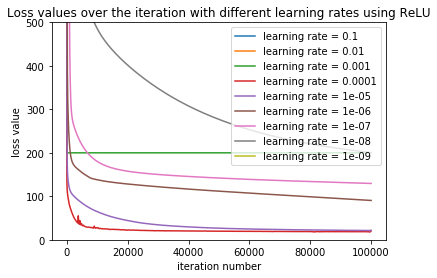

In [7]:
def exercise1_1():
    # generate hyper-parameters ranging from 0.1 to 10^-9
    rate_list = [math.pow(10, -n) for n in range(1, 1 + 9)]
    loss_values_over_iterations_with_different_learning_rates(
        gd_function=0,
        learning_rates=rate_list
    )

    
exercise1_1()


The plot is in the .ipynb file. We could conclude from the chart that... 
    * Local optimal point could not be reached, when the learning rate is much bigger than 0.001.
    * The learning is kind of slow when the learning rate is much smaller than 0.1e-6
    * The best learning rate is about 0.1e-3, which is 0.0001.


### exercise 1-2

In [8]:
def accuracy_over_different_sizes_of_hidden_layer(gd_function=0, n_units=[20, 30, 40, 50]):
    """
    exercise1-3-2
    :param n_units: list of sizes of the hidden layers to be tested. [20, 30, 40, 50] by default.
    :param gd_function: {0: gradient descent with ReLU, else: gradient descent with sigmoid function}
    :return:
    """
    if gd_function == 0:
        gradient_descent = gradient_descent_with_relu
        title = 'Accuracy over different sizes of hidden layer with ReLU'
    else:
        gradient_descent = gradient_descent_with_sigmoid_function
        title = 'Accuracy over different sizes of hidden layer with sigmoid function'

    accuracy_array = np.empty(len(n_units))
    x1, y1 = pre_train()

    for i in range(len(n_units)):
        _, accuracy_array[i] = gradient_descent(
            x1,
            y1,
            n_units=n_units[i],
        )

    figure3_1 = plt.figure()
    plt.plot(n_units, accuracy_array * 100, 'r+-')
    plt.title(title)
    plt.xlabel('Size of the hidden layer')
    plt.ylabel('accuracy percentage')
    plt.show()



The number of misclassified examples:  tensor(4)
The number of misclassified examples:  tensor(6)
The number of misclassified examples:  tensor(11)
The number of misclassified examples:  tensor(4)


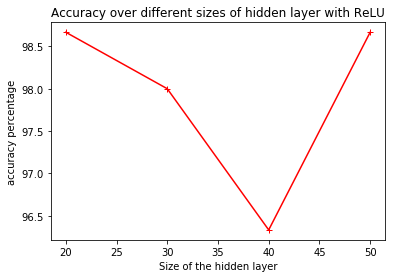

The number of misclassified examples:  tensor(51)
The number of misclassified examples:  tensor(12)
The number of misclassified examples:  tensor(33)
The number of misclassified examples:  tensor(3)
The number of misclassified examples:  tensor(3)
The number of misclassified examples:  tensor(2)


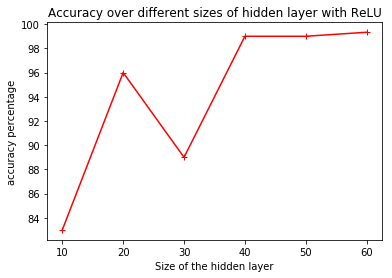

The number of misclassified examples:  tensor(48)
The number of misclassified examples:  tensor(28)
The number of misclassified examples:  tensor(66)
The number of misclassified examples:  tensor(8)
The number of misclassified examples:  tensor(19)
The number of misclassified examples:  tensor(29)
The number of misclassified examples:  tensor(42)
The number of misclassified examples:  tensor(17)
The number of misclassified examples:  tensor(32)
The number of misclassified examples:  tensor(6)
The number of misclassified examples:  tensor(5)
The number of misclassified examples:  tensor(17)
The number of misclassified examples:  tensor(18)
The number of misclassified examples:  tensor(15)
The number of misclassified examples:  tensor(4)
The number of misclassified examples:  tensor(7)
The number of misclassified examples:  tensor(4)
The number of misclassified examples:  tensor(7)
The number of misclassified examples:  tensor(5)
The number of misclassified examples:  tensor(6)
The numbe

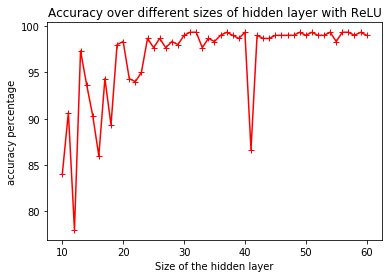

In [9]:
def exercise1_2():
    n_units = list(range(20, 60, 10))
    accuracy_over_different_sizes_of_hidden_layer(0, n_units)
    n_units = list(range(10, 70, 10))
    accuracy_over_different_sizes_of_hidden_layer(0, n_units)
    n_units = list(range(10, 61, 1))
    accuracy_over_different_sizes_of_hidden_layer(0, n_units)
    

exercise1_2()


* It seems that the accuracy first decreases and then increases when the size of the hidden layers increases, 
    and it has the worst accuracy when the size is 40, from the chart.
* However, the plots could be totally different when repeating the test.
* Extend the range of the size of the hidden layer to [10, 60] and test again. It seems it has the best performance when size is 40          this time.
* Decrease the step of the size range and test again. It is really hard to conclude...

### exercise 1-3-1

The number of misclassified examples:  tensor(200)
The number of misclassified examples:  tensor(200)
The number of misclassified examples:  tensor(163)
The number of misclassified examples:  tensor(236)
The number of misclassified examples:  tensor(172)
The number of misclassified examples:  tensor(173)
The number of misclassified examples:  tensor(201)
The number of misclassified examples:  tensor(220)
The number of misclassified examples:  tensor(200)


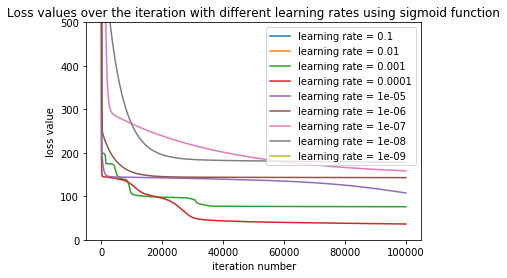

In [10]:
def exercise1_3_1():
    # generate hyper-parameters ranging from 0.1 to 10^-9
    rate_list = [math.pow(10, -n) for n in range(1, 1 + 9)]
    loss_values_over_iterations_with_different_learning_rates(
        gd_function=1,
        learning_rates=rate_list
    )
    

exercise1_3_1()


It seems to have best performance with the learning rate of 0.0001 again. However, it becomes kind of unstable. I would perfer to the 0.00001.

### exercise 1-3-2

The number of misclassified examples:  tensor(184)
The number of misclassified examples:  tensor(173)
The number of misclassified examples:  tensor(239)
The number of misclassified examples:  tensor(131)


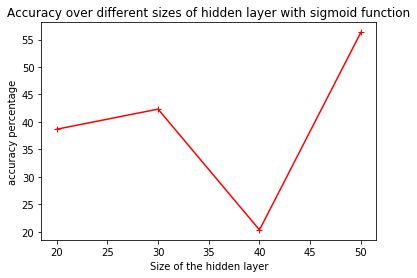

The number of misclassified examples:  tensor(206)
The number of misclassified examples:  tensor(226)
The number of misclassified examples:  tensor(210)
The number of misclassified examples:  tensor(216)
The number of misclassified examples:  tensor(165)
The number of misclassified examples:  tensor(167)


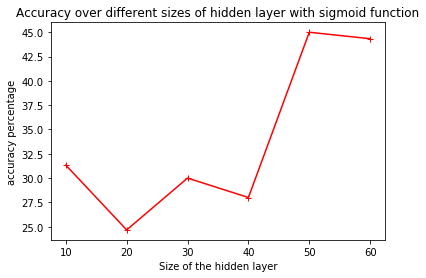

The number of misclassified examples:  tensor(151)
The number of misclassified examples:  tensor(199)
The number of misclassified examples:  tensor(198)
The number of misclassified examples:  tensor(205)
The number of misclassified examples:  tensor(259)
The number of misclassified examples:  tensor(156)
The number of misclassified examples:  tensor(213)
The number of misclassified examples:  tensor(202)
The number of misclassified examples:  tensor(189)
The number of misclassified examples:  tensor(175)
The number of misclassified examples:  tensor(180)
The number of misclassified examples:  tensor(135)
The number of misclassified examples:  tensor(213)
The number of misclassified examples:  tensor(211)
The number of misclassified examples:  tensor(179)
The number of misclassified examples:  tensor(198)
The number of misclassified examples:  tensor(129)
The number of misclassified examples:  tensor(157)
The number of misclassified examples:  tensor(201)
The number of misclassified exa

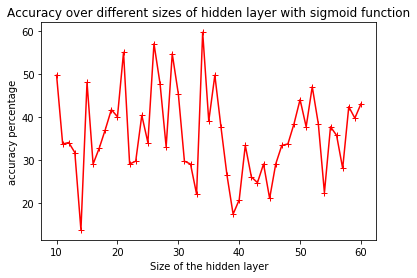

In [11]:
def exercise1_3_2():
    n_units = list(range(20, 60, 10))
    accuracy_over_different_sizes_of_hidden_layer(1, n_units)
    n_units = list(range(10, 70, 10))
    accuracy_over_different_sizes_of_hidden_layer(1, n_units)
    n_units = list(range(10, 61, 1))
    accuracy_over_different_sizes_of_hidden_layer(1, n_units)
    

exercise1_3_2()


Basically, we could conclude that it has the best accuracy when the size of the hidden layer is 50, though it behaves really weired with the size increasing.